### **Actividad Semanal #6**

* Nombre: Rafael J. Mateo C
* Matrícula: A01793054
* Materia: Ciencia y Analítica de Datos
* Profesor: María de la Paz
* Fecha: 1 Nov 2022

#### **Sobre el conjunto de Datos**


* Nombre: Default of Credit Card Clients Dataset
  
* Descripción: El conjunto de datos se refiere al caso de clientes de pagos en default de clientes de un banco de Taiwan, con la intención de poder estimar la probabilidad de default a partir de los atributos presente en la base de datos.

* Referencias: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

#### **1. Importación de los Datos**

Comencemos importando los datos que estaremos utilizando

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Veamos el tamaño del dataset con shape

In [28]:
df.shape

(30000, 25)

#### **2. Análisis Exploratorio de los Datos**

Vamos a realizar un análisis de los datos para determinar su estructura y forma. Empecemos primero revisando informaciones generales, como los nombres de cada columna y el tipo de dato de cada columna. Esto nos permitirá saber el tipo de análisis a realizar.

In [29]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [30]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Revisemos la información general de nuestro dataset.

De esta información se puede observar de manera inmediata la existencia de valores nulos en varias de las columnas.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Lo anterior también lo podemos confirmar con el método isna

In [32]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Ahora hagamos una copia de los datos originales para evitar manipular el DF original

In [33]:
df_copy = df.copy() #copiamos los datos para no manipular los originales

Observemos el conteo de las categorías de cada variable categórica. Esto nos permitirá saber si los datos se encuentran en el rango esperado, según la información de los metadatos.

In [34]:
attrs = ["X2", "X3", "X4"]
attr_count = {}

for attr in attrs:
    attr_count[attr] = df_copy[[attr]].value_counts()
    

pd.DataFrame(attr_count)

,X2,X3,X4
0.0,NaN,14,54.0
1.0,11887.0,10585,13657.0
2.0,18112.0,14030,15964.0
3.0,NaN,4915,323.0
4.0,NaN,123,NaN
5.0,NaN,280,NaN
6.0,NaN,51,NaN


De la tabla anterior se puede observar lo siguiente:

* La variable X2 (Género) solo tiene valores 1 y 2, lo cual es de esperarse según la información de los metadatos.
* La variable X3 (Educación) tiene valores desde 0 hasta 6, cuando el rango esperado es de 1 a 4.
* La variable X4 (Estado marital) tiene valores que van del 0 al 3, cuando el rango debe ser de 1 a 3.

Ahora revisemos cuantos registros tienen tienen información incorrecta:

In [35]:
df_copy.shape[0] - df_copy.drop(df_copy[(df_copy.X3 > 4) | (df_copy.X3 == 0) | (df_copy.X4 == 0)].index).shape[0]

399

Como se observa en el paso anterior, un total de 399 registros tienen información incorrecta. Como apenas representa cerca de un 1% del total de los datos, se procederá a eliminarlos.

In [36]:
df_copy.drop(df_copy[(df_copy.X3 > 4) | (df_copy.X3 == 0) | (df_copy.X4 == 0)].index, inplace=True)
df_copy.shape

(29601, 25)

A continuación revisaremos la columna de las edades para verificar si la información es correcta.

In [37]:
df_copy.X5.describe()

count    29596.000000
mean        35.462765
std          9.213361
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

De la información anterior se observa que la columna de edad tiene valores esperados. Por ejemplo, el valor mínimo es de 21, lo cual hace sentido ya que para obtener una tarjeta de crédito debe ser mayor de edad. También se observa que el valor máximo es 79 años, lo cual está dentro del rango de vida esperado para una persona. También se puede apreciar que  la media y la mediana están en alrededor de 35 años, con una desviación estándar de 9 años. El hecho de tener una media y mediana tan parecida significa que no existe una variación significativa de los datos.

Del análisis anterior se puede concluir que para fines de imputación se puede aplicar tanto la media como la mediana, ya que ambas son muy parecidas entre si.

Ahora revisemos las variables X6 hasta X11, los cuales representan el histórico de pagos pasados. Según la información de los metadatos, la escala de posibles valores para este conjunto de datos debe ir desde -1 hasta 9, excluyendo el 0.

In [38]:
attrs = ["X6", "X7", "X8", "X9", "X10", "X11"]
attr_count = {}

for attr in attrs:
    attr_count[attr] = df_copy[[attr]].value_counts()
    

pd.DataFrame(attr_count)

,X6,X7,X8,X9,X10,X11
-2.0,2708,3722,4027,4287,4479.0,4806.0
-1.0,5631,5987,5860,5615,5476.0,5669.0
0.0,14498,15474,15515,16199,16674.0,16045.0
1.0,3662,28,4,2,NaN,NaN
2.0,2640,3904,3802,3140,2615.0,2755.0
3.0,320,326,237,180,177.0,183.0
4.0,76,97,76,69,84.0,49.0
5.0,24,25,21,35,17.0,13.0
6.0,11,12,23,5,4.0,19.0
7.0,9,20,27,58,58.0,46.0


De la información anterior se observa que hay muchos valores fuera de la escala permitida. Por ejemplo, todas las columnas tienen valores de -2 y 0, cuando la escala no permite estos valores. Debido a la cantidad de registros con información errónea (un pooco más de 50%), no se recomienda reemplazar o eliminar valores. 

La mejor estrategia a seguir en este caso es revisar el método de recolección de información, o bien, consultar con algún experto en el tema sobre la posibilidad de hacer sustituciones (por ejemplo, considerar -2 y 0 como -1).

Ahora revisemos las variables X12 a X17, las cuales representan el estado de cuenta por mes.

In [39]:
attrs = ["X12", "X13", "X14", "X15", "X16", "X17"]
stats_df = pd.DataFrame(columns = attrs)

for attr in attrs:
    stats_df[attr] = df_copy[[attr]].describe()
    
stats_df

,X12,X13,X14,X15,X16,X17
count,29590.000000,29590.000000,2.958800e+04,29586.000000,29584.000000,29591.000000
mean,50971.047482,48953.918216,4.681547e+04,43135.357703,40248.771194,38867.947079
std,73379.712238,70933.711783,6.913550e+04,64209.184413,60712.328361,59527.190374
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3542.500000,2975.000000,2.652000e+03,2329.250000,1780.000000,1278.500000
50%,22274.000000,21054.500000,2.003600e+04,19005.500000,18092.500000,17126.000000
75%,66645.250000,63532.000000,5.984175e+04,54286.000000,50089.250000,49137.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


De los datos anteriores se observan valores negativos. Esto podría indicar saldo a favor del cliente de la tarjeta. Sin embargo, es recomendable consultar con un experto en el tema sobre el significado de los valores negativos. Otro aspecto que se puede apreciar es que hay mucha dispersión en los datos. Esto puede evidenciarse tanto en la diferencia que existe entre la media y mediana, así como en la desviación estándar.

De lo anterior se puede concluir que para fines de imputación, la mejor estrategia es la mediana ya que representa mejor la tendencia central de los datos cuando hay mucha variación. Sin embargo, por instrucciones del ejercicio se estará aplicando la media.

Ahora hagamos lo mismo para las variables X18 a X23, las cuales representan el monto pagado en el periodo anterior.

In [40]:
attrs = ["X18", "X19", "X20", "X21", "X22", "X23"]
stats_df = pd.DataFrame(columns = attrs)

for attr in attrs:
    stats_df[attr] = df_copy[[attr]].describe()
    
stats_df

,X18,X19,X20,X21,X22,X23
count,29593.000000,2.959200e+04,29593.000000,29590.000000,29590.000000,29596.000000
mean,5648.913358,5.896124e+03,5198.349643,4829.851740,4795.952957,5182.088221
std,16569.162136,2.309255e+04,17582.390712,15713.694137,15246.781069,17658.652604
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.270000e+02,390.000000,298.250000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4015.000000,4047.250000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Para las variables anteriores no se observan valores anormales o que deban ser revisados.

Ahora definamos las Xs y la y de nuestro conjunto de datos, así como las variables por su tipo (ordinales, categóricas y numéricas)

In [82]:
X = df_copy[df_copy.columns[:24]]
y = df_copy[df_copy.columns[-1:]]


In [51]:
ord_vars = ["X6", "X7", "X8", "X9", "X10", "X11"]
cat_vars = ["X2", "X3", "X4"]

#Estas son las variables que nos interesan para el PCA
num_vars = ["X1", "X5", "X12", "X13", "X14", "X15", "X16", "X17","X18", "X19", "X20", "X21", "X22", "X23"]

Veamos los diagramas de caja para cada una de las variables numéricas, y determinemos la presencia de valores atípicos.

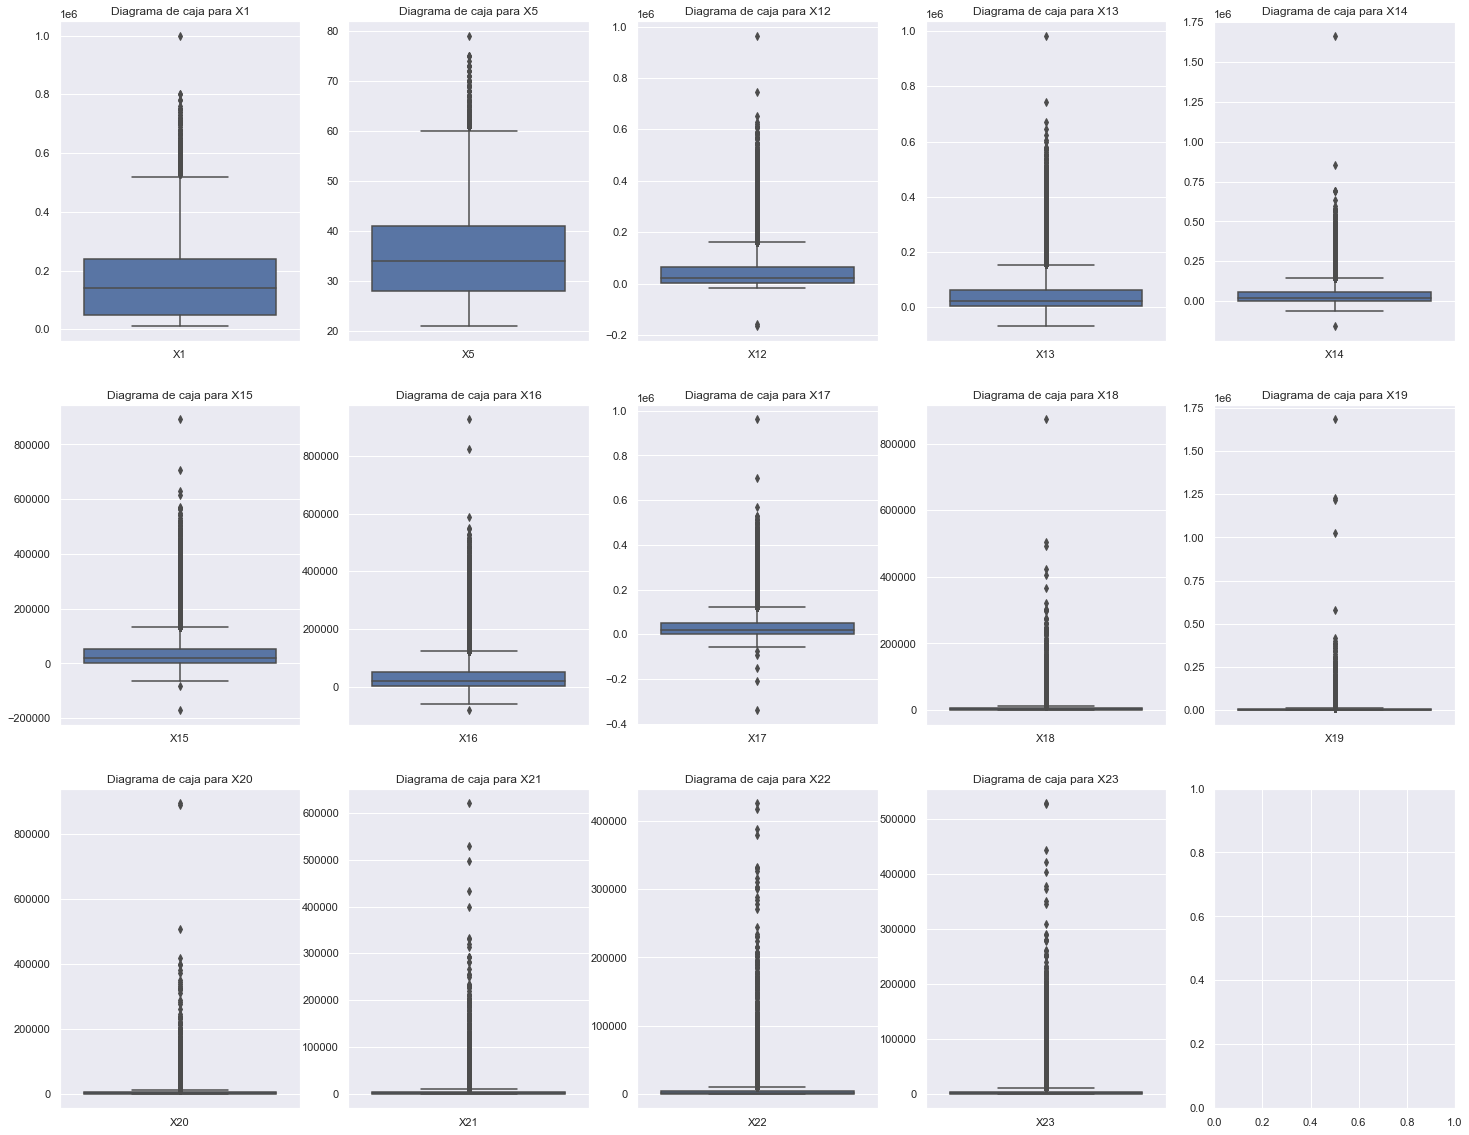

In [102]:
fig,axes = plt.subplots(3,5, figsize = (25,20))
plot_count = 0

for i in range(3):
    for j in range(5):
        if (plot_count < 14):
            sns.boxplot(data = X[[num_vars[plot_count]]], ax=axes[i,j])
            axes[i,j].set_title(f"Diagrama de caja para {num_vars[plot_count]}")
            plot_count = plot_count + 1

Del gráfico anterior se observa presencia de valores atípicos en todas las variables. Esto significa que la mejor estrategia de imputación para la mayoría de los datos es la mediana, ya que tiende a ser menos afectadas por datos atípicos (sin embargo, por instrucciones del ejercicio, se estará usando la media en su lugar). También de lo anterior se concluye la necesidad de escalar los datos, ya que sus rangos son muy diferentes. Para ello usaremos el StandardScaler.

Aunque de los diagramas de caja que se muestran arriba se observa una distribución sesgada a la derecha, obtengamos también los histogramas para visualizar mejor esta información.

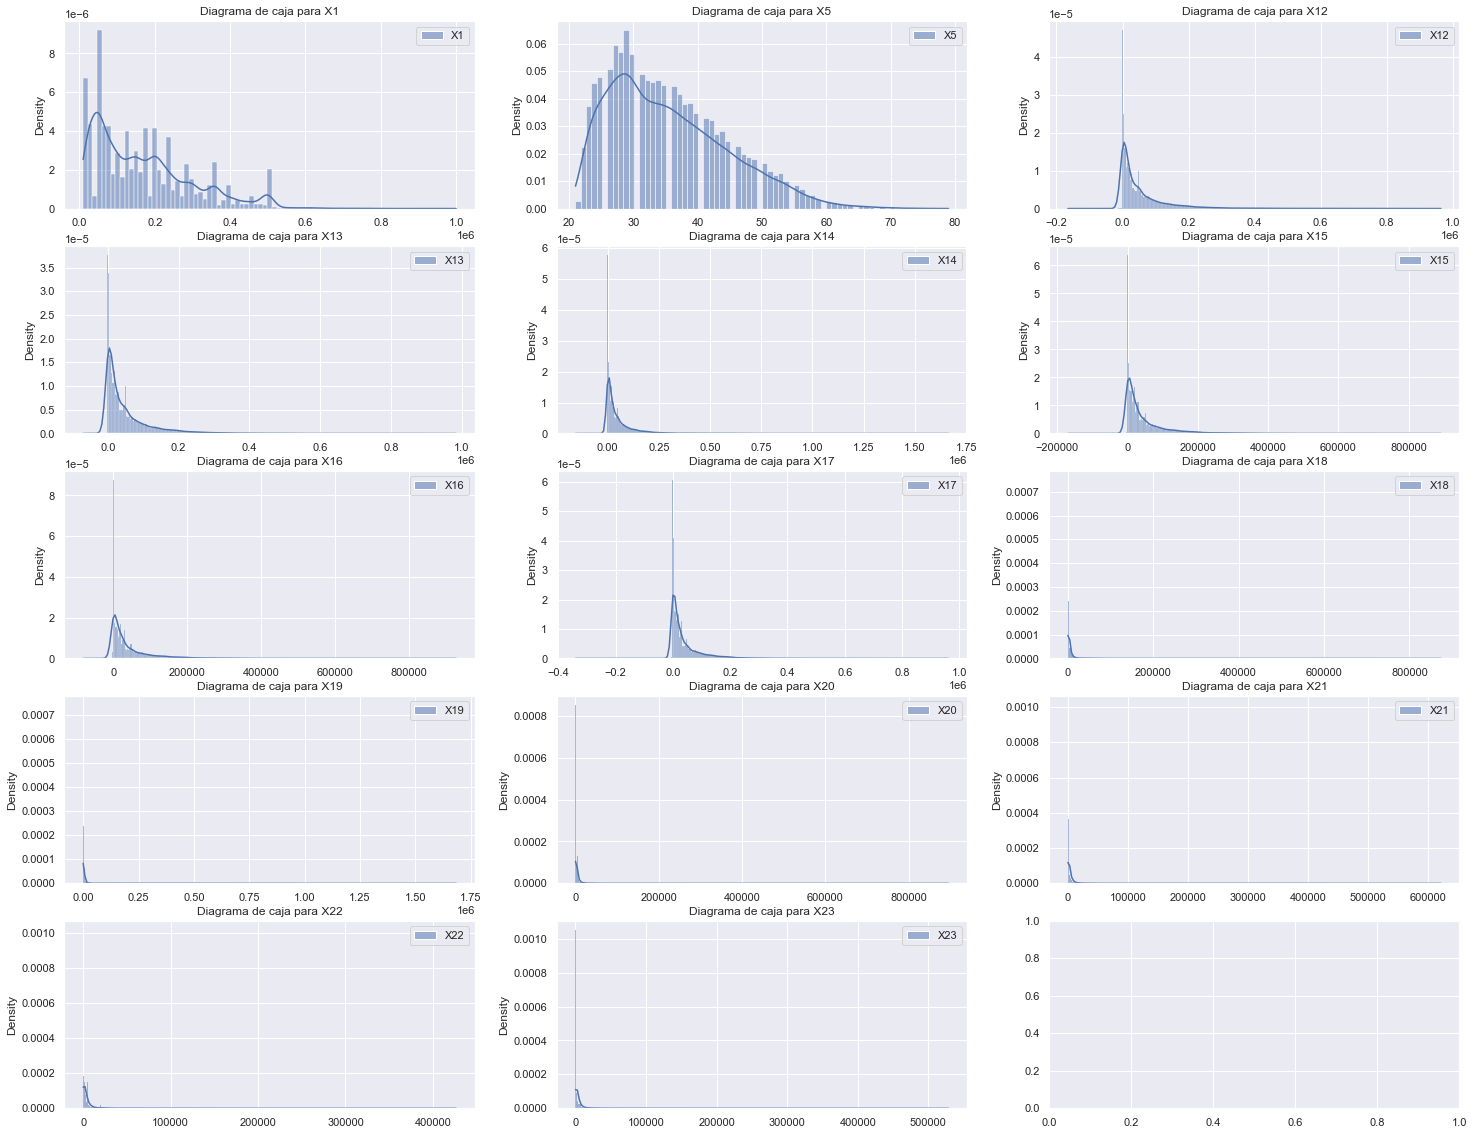

In [112]:
fig,axes = plt.subplots(5,3, figsize = (25,20))
plot_count = 0


for i in range(5):
    for j in range(3):
        if (plot_count < 14):
            sns.histplot(data = X[[num_vars[plot_count]]], ax=axes[i,j], kde=True, stat="density")
            axes[i,j].set_title(f"Diagrama de caja para {num_vars[plot_count]}")
            plot_count = plot_count + 1

Del gráfico anterior se observa que todas las variables presentan un sesgo positivo. En el caso de las variables X12 en adelante, se puede ver que el sesgo se debe a la presencia de los datos atípicos. Esto también puede verse en los diagramas de cajas que se graficaron más arriba.

De lo anterior se concluye que de utilizar estos datos en un modelo requeriría hacer algún tipo de transformación para obtener una distribución más uniforme.

#### **3. Limpieza e Imputación de los Datos**

En esta sección procederemos a limpiar los datos, por medio de los Pipeline de sklearn. Comencemos primero definiendo los pipes para cada tipo de variable.

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_pipe = Pipeline (steps = [
    ("imputer", SimpleImputer(strategy='most_frequent')) #Imputamos los nulos con la moda
])

num_pipe = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="mean")), #Imputamos los nulos con la media
     ("scaler", StandardScaler()), #Escalamos los datos
     ("pca", PCA())
])


transformer = ColumnTransformer([
    ("cat", cat_pipe, ord_vars + cat_vars),
    ("num", num_pipe, num_vars)
    ])

Hagamos ahora la limpieza de los datos, llamando el método fit del ColumnTransformer. Esto ejecutará los pipes correspondientes a cada conjunto de datos.

In [170]:
transformer.fit(X,y)

Ahora nos interesa conocer las proyecciones de los componentes. Para esto debemos obtener el objeto PCA de los pipes y aplicar la transformación al conjunto de datos.

In [ ]:
pcs = transformer.named_transformers_["num"]["pca"]

projections = transformer.named_transformers_["num"].fit_transform(X,y)

Revisemos la varianza explicada por cada uno de los componentes para seleccionar los componentes principales.

In [61]:
#Creamos las etiquetas de cada componente
comp_labels = [f"PCA {i + 1}" for i in range(len(num_vars))]

pd.DataFrame({
    'Attr': comp_labels,
    'Proportion of variance': pcs.explained_variance_ratio_,
    "Cumsum of explained variance": np.cumsum(pcs.explained_variance_ratio_)
})

,Attr,Proportion of variance,Cumsum of explained variance
0,PCA 1,0.423001,0.423001
1,PCA 2,0.122884,0.545886
2,PCA 3,0.074648,0.620533
3,PCA 4,0.066086,0.686620
4,PCA 5,0.063126,0.749746
5,PCA 6,0.062346,0.812092
6,PCA 7,0.055636,0.867728
7,PCA 8,0.051822,0.919550
8,PCA 9,0.050462,0.970011
9,PCA 10,0.018633,0.988645


Construyamos un screeplot para visualizar mejor el acumulado de las varianzas.

Text(0, 0.5, 'Explained Variance')

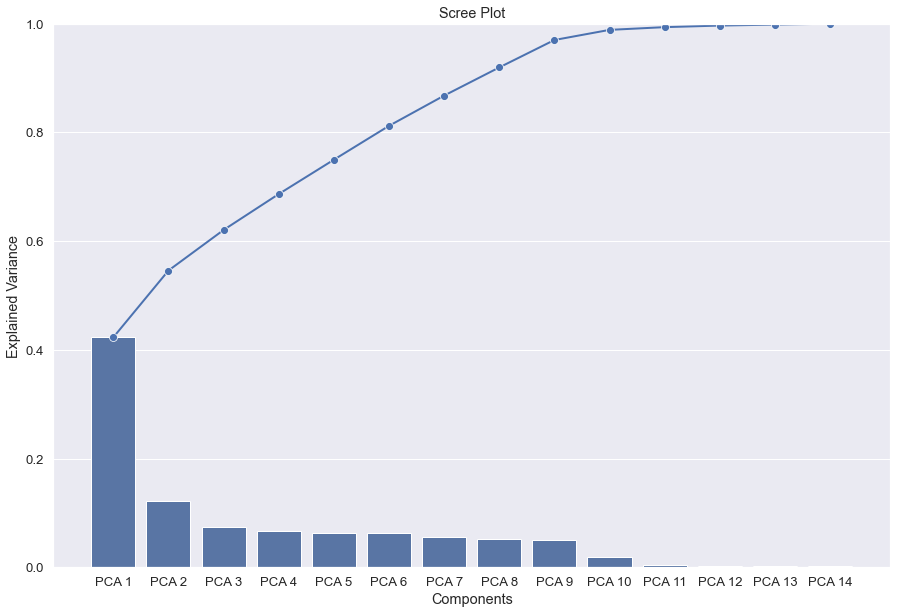

In [63]:
sns.set(font_scale = 1.2, rc = {'figure.figsize':(15,10)})
sns.barplot(x = comp_labels, y = pcs.explained_variance_ratio_, color = 'b')
sns.lineplot(
    x = comp_labels, 
    y = np.cumsum(pcs.explained_variance_ratio_),
    marker= "o",
    markersize = 8,
    linewidth = 2,
    linestyle = "-")

plt.ylim(0,1)
plt.title("Scree Plot")
plt.xlabel("Components")
plt.ylabel("Explained Variance")

De la tabla y el gráfico anterior se observa que los primeros 5 componentes explican un poco más del 80% de la variabilidad de los datos. Esto quiere decir que los primeros cinco componentes podrían ser seleccionados como los componentes principales a utilizar en un modelo de ML.

Ahora analicemos las proyecciones de cada componente por medio de un diagrama de correlación. Para esto, obtengamos primero el diagrama de correlación de los datos sin transformar para ver su distribución.

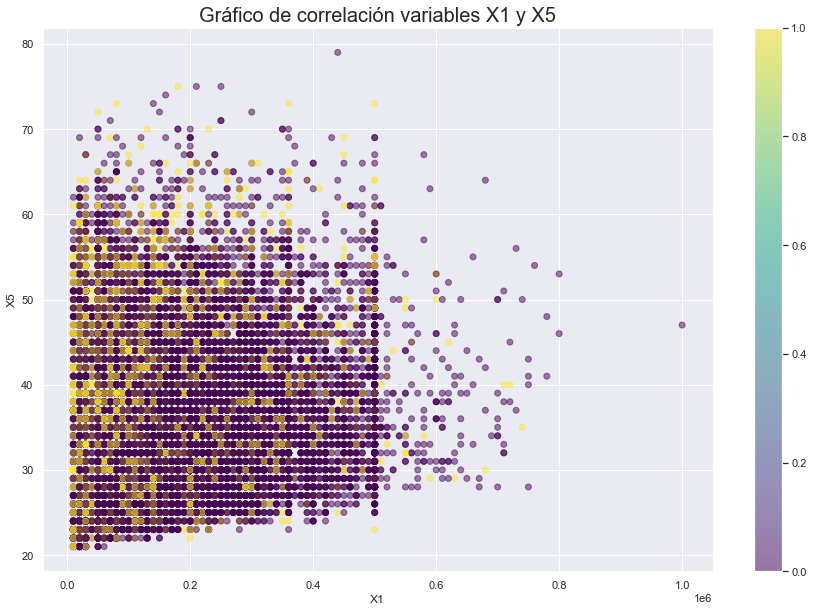

In [233]:
plt.scatter(x = X.X1, y = X.X5, alpha=0.5, c = y.values.ravel(), cmap='viridis', label=y.values.ravel())
plt.title("Gráfico de correlación variables X1 y X5", fontdict={'fontsize': 20})
plt.xlabel("X1")
plt.ylabel("X5")

plt.colorbar()

Del gráfico anterior se observa que las distribuciones de ambas variables se solapan, y no hay separación entre ellas. Además se observa que no existe una correlación significativa entre estas dos variables, aunque si se observan algunos patrones, como una línea vertical que forman los puntos entre el 0.4 y 0.6.

La correlación la podemos confirmar con el método corr. Como se muestra, la correlación es muy baja entre ambas variables.

In [230]:
X[["X1", "X5"]].corr()

,X1,X5
X1,1.000000,0.144185
X5,0.144185,1.000000


Ahora veamos el diagrama de correlación de las proyecciones de X1 y X5

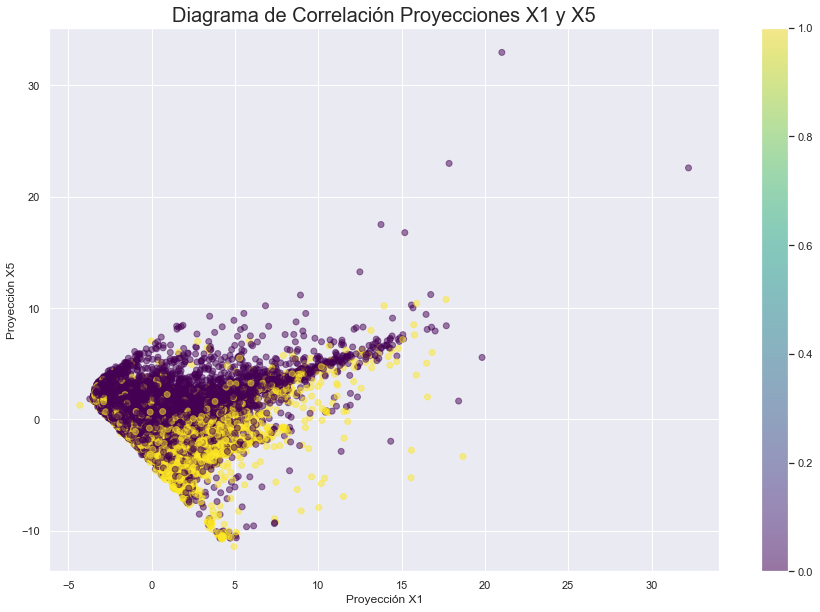

In [234]:

plt.scatter(x = projections[:,0], y = projections[:,1], cmap='viridis', alpha=0.5,c=y.values.ravel())
plt.title("Diagrama de Correlación Proyecciones X1 y X5", fontdict={"fontsize": 20})
plt.xlabel("Proyección X1")
plt.ylabel("Proyección X5")
plt.colorbar()

De este diagrama se observa como los datos están divididos en dos clústers. También se muestran algunos datos atípicos, que son los puntos qiue se alejan del conjunto de datos.

Ahora podemos pasar a revisar los pesos de cada variable en cada uno de los componentes, esto con el fin de determinar el impacto que tiene cada variable en los componentes.

In [114]:
pcs_comps = pd.DataFrame(
    pcs.components_.round(4), 
    columns = num_vars, 
    index = comp_labels) #Colocamos los componentes principales en un dataframe

pcs_comps = pcs_comps.transpose() #Transponemos el dataframe para mejor lectura
pcs_comps.iloc[:,:6] #Solo nos interesa los componentes principales y como mencionamos arribia, seleccionamos 6

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6
X1,0.1648,0.3014,-0.3792,-0.2063,0.0294,-0.0759
X5,0.0319,0.0727,-0.8701,0.3378,-0.0299,0.0740
X12,0.3724,-0.1913,-0.0347,-0.0655,0.0376,-0.0429
X13,0.3832,-0.1750,-0.0018,0.0053,0.0813,-0.0313
X14,0.3883,-0.1267,0.0352,0.0599,0.1163,0.0944
X15,0.3916,-0.1202,0.0327,0.0732,0.0310,0.0165
X16,0.3888,-0.1053,0.0316,0.0397,-0.1059,-0.0984
X17,0.3812,-0.0929,0.0181,-0.0672,-0.1625,0.0723
X18,0.1356,0.3833,0.1747,0.3554,0.2315,0.0226
X19,0.1170,0.4078,0.2014,0.3507,0.1640,0.3946


La tabla anterior muestra la contribución de cada variable en los componentes en términos de magnitud y dirección. Por ejemplo, podemos ver que la variable X1 tiene una magnitud de 0.1648 y una dirección positiva en el componente PC1, mientras que la variable X5 tiene una magnitud de 0.87 para el componente PC3 y una dirección negativa.

También podemos generar un heatmap para identificar más fácilmente las variables que más impactan en los 6 componentes principales.

<AxesSubplot:>

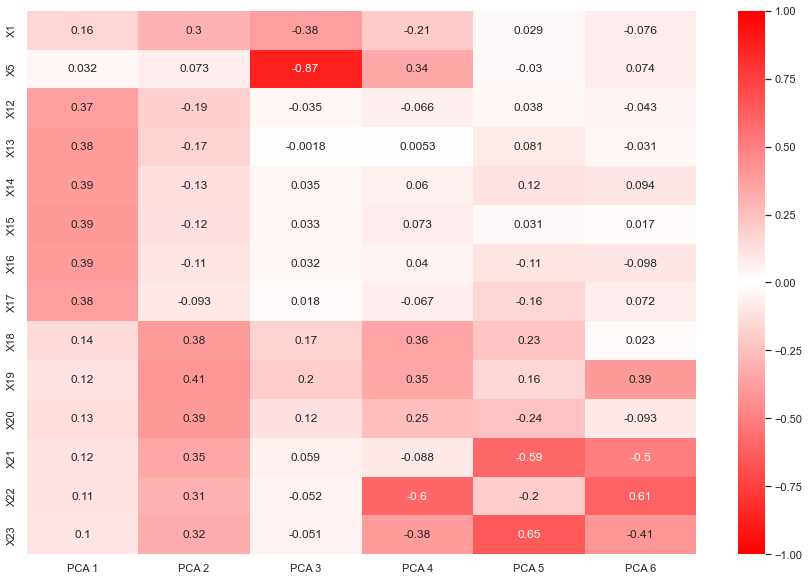

In [115]:
from matplotlib.colors import LinearSegmentedColormap


sns.set(rc = {'figure.figsize':(15,10)})
cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','red'])
sns.heatmap(pcs_comps.iloc[:,:6], vmin = -1, vmax = 1, cmap =cmap, annot= True)

Con el gráfico anterior es mucho más fácil identificar el impacto de cada variable en los componentes. Por ejemplo, se describe la relación de las variables para algunos de los componentes seleccionados:

* En el componente 1 se visualiza que las variables X12 a X17 son las que más impacto tienen sobre este. Esto significa que el componente 1 mide principalmente el monto del estado de cuenta de las tarjetas, y su magnitud tiene una dirección positiva.
* El componente 2 tiene magnitudes altas para las variables X18 a X23 y de dirección positiva, por lo que este componente mide mayormente el pago del periodo anterior.
* El componente 3 tiene una alta contribución de la variable X5, por lo que en este componente se concentra la información de la edad. En este caso, la dirección de la magnitud es negativa.


Ahora, veamos una tabla que resume la variable de mayor peso para cada componente principal, tomando en cuenta que esto debe hacerse con el valor absoluto de los pesos de los componentes.

In [116]:
id_max = pcs_comps.iloc[:,:6].abs().idxmax()
max_val = pcs_comps.iloc[:,:6].abs().max()

pd.DataFrame({"Variable with max weight": id_max, "Weight": max_val})

,Variable with max weight,Weight
PCA 1,X15,0.3916
PCA 2,X19,0.4078
PCA 3,X5,0.8701
PCA 4,X22,0.5960
PCA 5,X23,0.6463
PCA 6,X22,0.6146


Como se observa arriba, para el componente uno la variable que más contribuye, por tener un mayor peso, es X15. En el caso de X19 esta es la que más contribuye para el componente 2, mientras que la variable X5 es la que más impacta en el componente PC3. se observa que n el caso de las variables X22 y X23, tienen mayor peso para los componentes 4-6.

También de la tabla anterior se puede observar la magnitud de los pesos para cada una de las variables y la dirección, la cual es positiva en todos los casos. Mientras más grande sea el valor absoluto de los pesos, mayor será la contribución de esa variable para el cálculo del componente.

Ahora observemos las 3 variables que tienen menor peso para cada uno de los componentes.

In [117]:
id_min = pcs_comps.iloc[:,:6].abs().idxmin()
min_val = pcs_comps.iloc[:,:6].abs().min()

pd.DataFrame({"Variable with min weight": id_min, "Weight": min_val})

,Variable with min weight,Weight
PCA 1,X5,0.0319
PCA 2,X5,0.0727
PCA 3,X13,0.0018
PCA 4,X13,0.0053
PCA 5,X1,0.0294
PCA 6,X15,0.0165


#### **4. Conclusiones**

Del análisis realizado en este ejercicio se obtuvieron las siguientes conclusiones:

* Alta variablidad en la mayoría de las variables numéricas. La mejor estrategia de imputación es la mediana, pero al final se utilizó la media para apegarse a las instrucciones del ejercicio.
* Existen valores incompatibles con la descripción de los metadatos. Como representaban muy pocas observaciones, estos valores fueron eliminados.
* Existen muchos otras observaciones que deben ser investigadas con el experto en el negocio, ya que el rango de los valores no coincide con lo descrito con los metadatos.
* Los datos fueron escalados, ya que el rango de cada variable es muy diferente entre una y otra.
* Del análisis PCA se concluye que 6 componentes explican alrededor del 81% de la variación.